In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [5]:
salary_df=pd.read_csv('data/glassdoor_salary_cleaned.csv')

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return "data scientist"
    elif 'data engineer' in title.lower():
        return "data engineer"
    elif 'analyst' in title.lower():
        return "analyst"
    elif 'machine learning' in title.lower():
        return "mle"
    elif 'manager' in title.lower():
        return "manager"
    elif 'director' in title.lower():
        return "director"
    else:
        return "na"

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return "senior"
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return "jr"
    else:
        return "na"


In [7]:
#simplify job titles and get the seniority

salary_df['title_simplified']=salary_df['Job Title'].apply(title_simplifier)
print(salary_df['title_simplified'].value_counts())
salary_df['seniority']=salary_df['Job Title'].apply(seniority)
salary_df['seniority'].value_counts()

title_simplified
data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: count, dtype: int64


seniority
na        520
senior    220
jr          2
Name: count, dtype: int64

In [8]:
# Fix 'Los Angeles' status and delete blanks
salary_df['job_state']=salary_df['job_state'].apply(lambda x : x.strip() if x.strip().lower() != 'los angeles' else 'CA')
salary_df['job_state'].value_counts()

job_state
CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
UT     10
WI     10
AZ      9
MO      9
AL      8
GA      6
MI      6
KY      6
DE      6
IA      5
CT      5
OR      4
NE      4
LA      4
NM      3
KS      3
MN      2
ID      2
RI      1
SC      1
Name: count, dtype: int64

In [9]:
# getting job description length
salary_df['desc_len']=salary_df['Job Description'].apply(lambda x : len (x))
salary_df.desc_len

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

In [10]:
#competitor count
salary_df['number_comp']=salary_df['Competitors'].apply(lambda x : len(x.split(',')) if x!= '-1' else 0)
salary_df['number_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: number_comp, Length: 742, dtype: int64

In [11]:
salary_df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'same_state',
       'company_age', 'python_yn', 'r_studio', 'spark', 'aws', 'excel',
       'title_simplified', 'seniority', 'desc_len', 'number_comp'],
      dtype='object')

In [12]:
#hourly to annual
salary_df['min_salary']=salary_df.apply(lambda x : x['min_salary']*2 if x['hourly']==1 else x['min_salary'],axis=1)
salary_df['max_salary']=salary_df.apply(lambda x : x['max_salary']*2 if x['hourly']==1 else x['max_salary'],axis=1)

In [13]:
salary_df[['min_salary', 'max_salary', 'hourly']][salary_df['hourly']==1]

,min_salary,max_salary,hourly
165,34,48,1
177,42,68,1
197,36,50,1
202,42,68,1
210,30,50,1
246,34,48,1
271,42,68,1
337,36,50,1
345,48,78,1
357,42,68,1


In [14]:
salary_df[['Company Name','company_text']]

,Company Name,company_text
0,Tecolote Research\r\n3.8,Tecolote Research\r\n
1,University of Maryland Medical System\r\n3.4,University of Maryland Medical System\r\n
2,KnowBe4\r\n4.8,KnowBe4\r\n
3,PNNL\r\n3.8,PNNL\r\n
4,Affinity Solutions\r\n2.9,Affinity Solutions\r\n
...,...,...
737,GSK\r\n3.9,GSK\r\n
738,Eventbrite\r\n4.4,Eventbrite\r\n
739,Software Engineering Institute\r\n2.6,Software Engineering Institute\r\n
740,"Numeric, LLC\r\n3.2","Numeric, LLC\r\n"


In [15]:
salary_df['company_text']=salary_df['company_text'].apply(lambda x: x.replace('\n',''))
salary_df[['Company Name','company_text']]

,Company Name,company_text
0,Tecolote Research\r\n3.8,Tecolote Research\r
1,University of Maryland Medical System\r\n3.4,University of Maryland Medical System\r
2,KnowBe4\r\n4.8,KnowBe4\r
3,PNNL\r\n3.8,PNNL\r
4,Affinity Solutions\r\n2.9,Affinity Solutions\r
...,...,...
737,GSK\r\n3.9,GSK\r
738,Eventbrite\r\n4.4,Eventbrite\r
739,Software Engineering Institute\r\n2.6,Software Engineering Institute\r
740,"Numeric, LLC\r\n3.2","Numeric, LLC\r"


In [16]:
salary_df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,same_state,company_age,python_yn,r_studio,spark,aws,excel,desc_len,number_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,51.322102,0.528302,0.002695,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,54.026459,0.499535,0.051882,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,281.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


<Axes: >

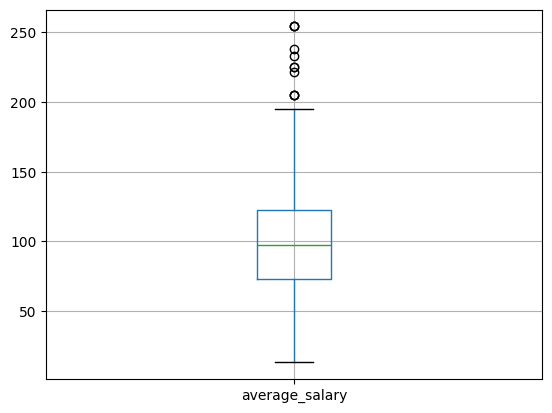

In [17]:
salary_df.boxplot(column='average_salary')

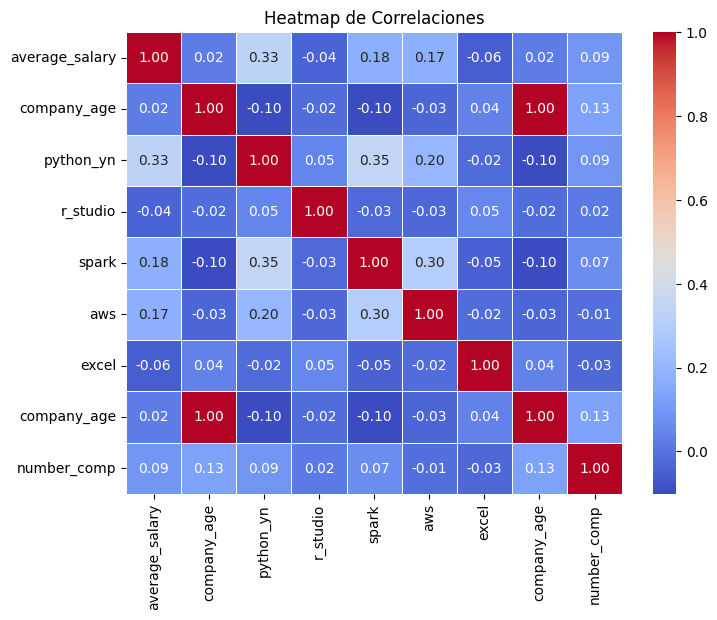

In [18]:
#somo correlations
corr=salary_df[['average_salary','company_age', 'python_yn', 'r_studio', 'spark', 'aws', 'excel','company_age','number_comp']].corr()

plt.figure(figsize=(8, 6))  
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlaciones")
plt.show()

In [19]:
salary_df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'same_state',
       'company_age', 'python_yn', 'r_studio', 'spark', 'aws', 'excel',
       'title_simplified', 'seniority', 'desc_len', 'number_comp'],
      dtype='object')

In [20]:
categorical_df=salary_df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue' ,'company_text', 'job_state', 'same_state','python_yn', 'r_studio', 'spark', 'aws', 'excel',
       'title_simplified', 'seniority']].copy()

C:\Users\Clagu\AppData\Local\Temp\ipykernel_1052\3066401691.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)  # Rotate labels
C:\Users\Clagu\AppData\Local\Temp\ipykernel_1052\3066401691.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)  # Rotate labels
C:\Users\Clagu\AppData\Local\Temp\ipykernel_1052\3066401691.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)  # Rotate labels
C:\Users\Clagu\AppData\Local\Temp\ipykernel_1052\3066401691.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. af

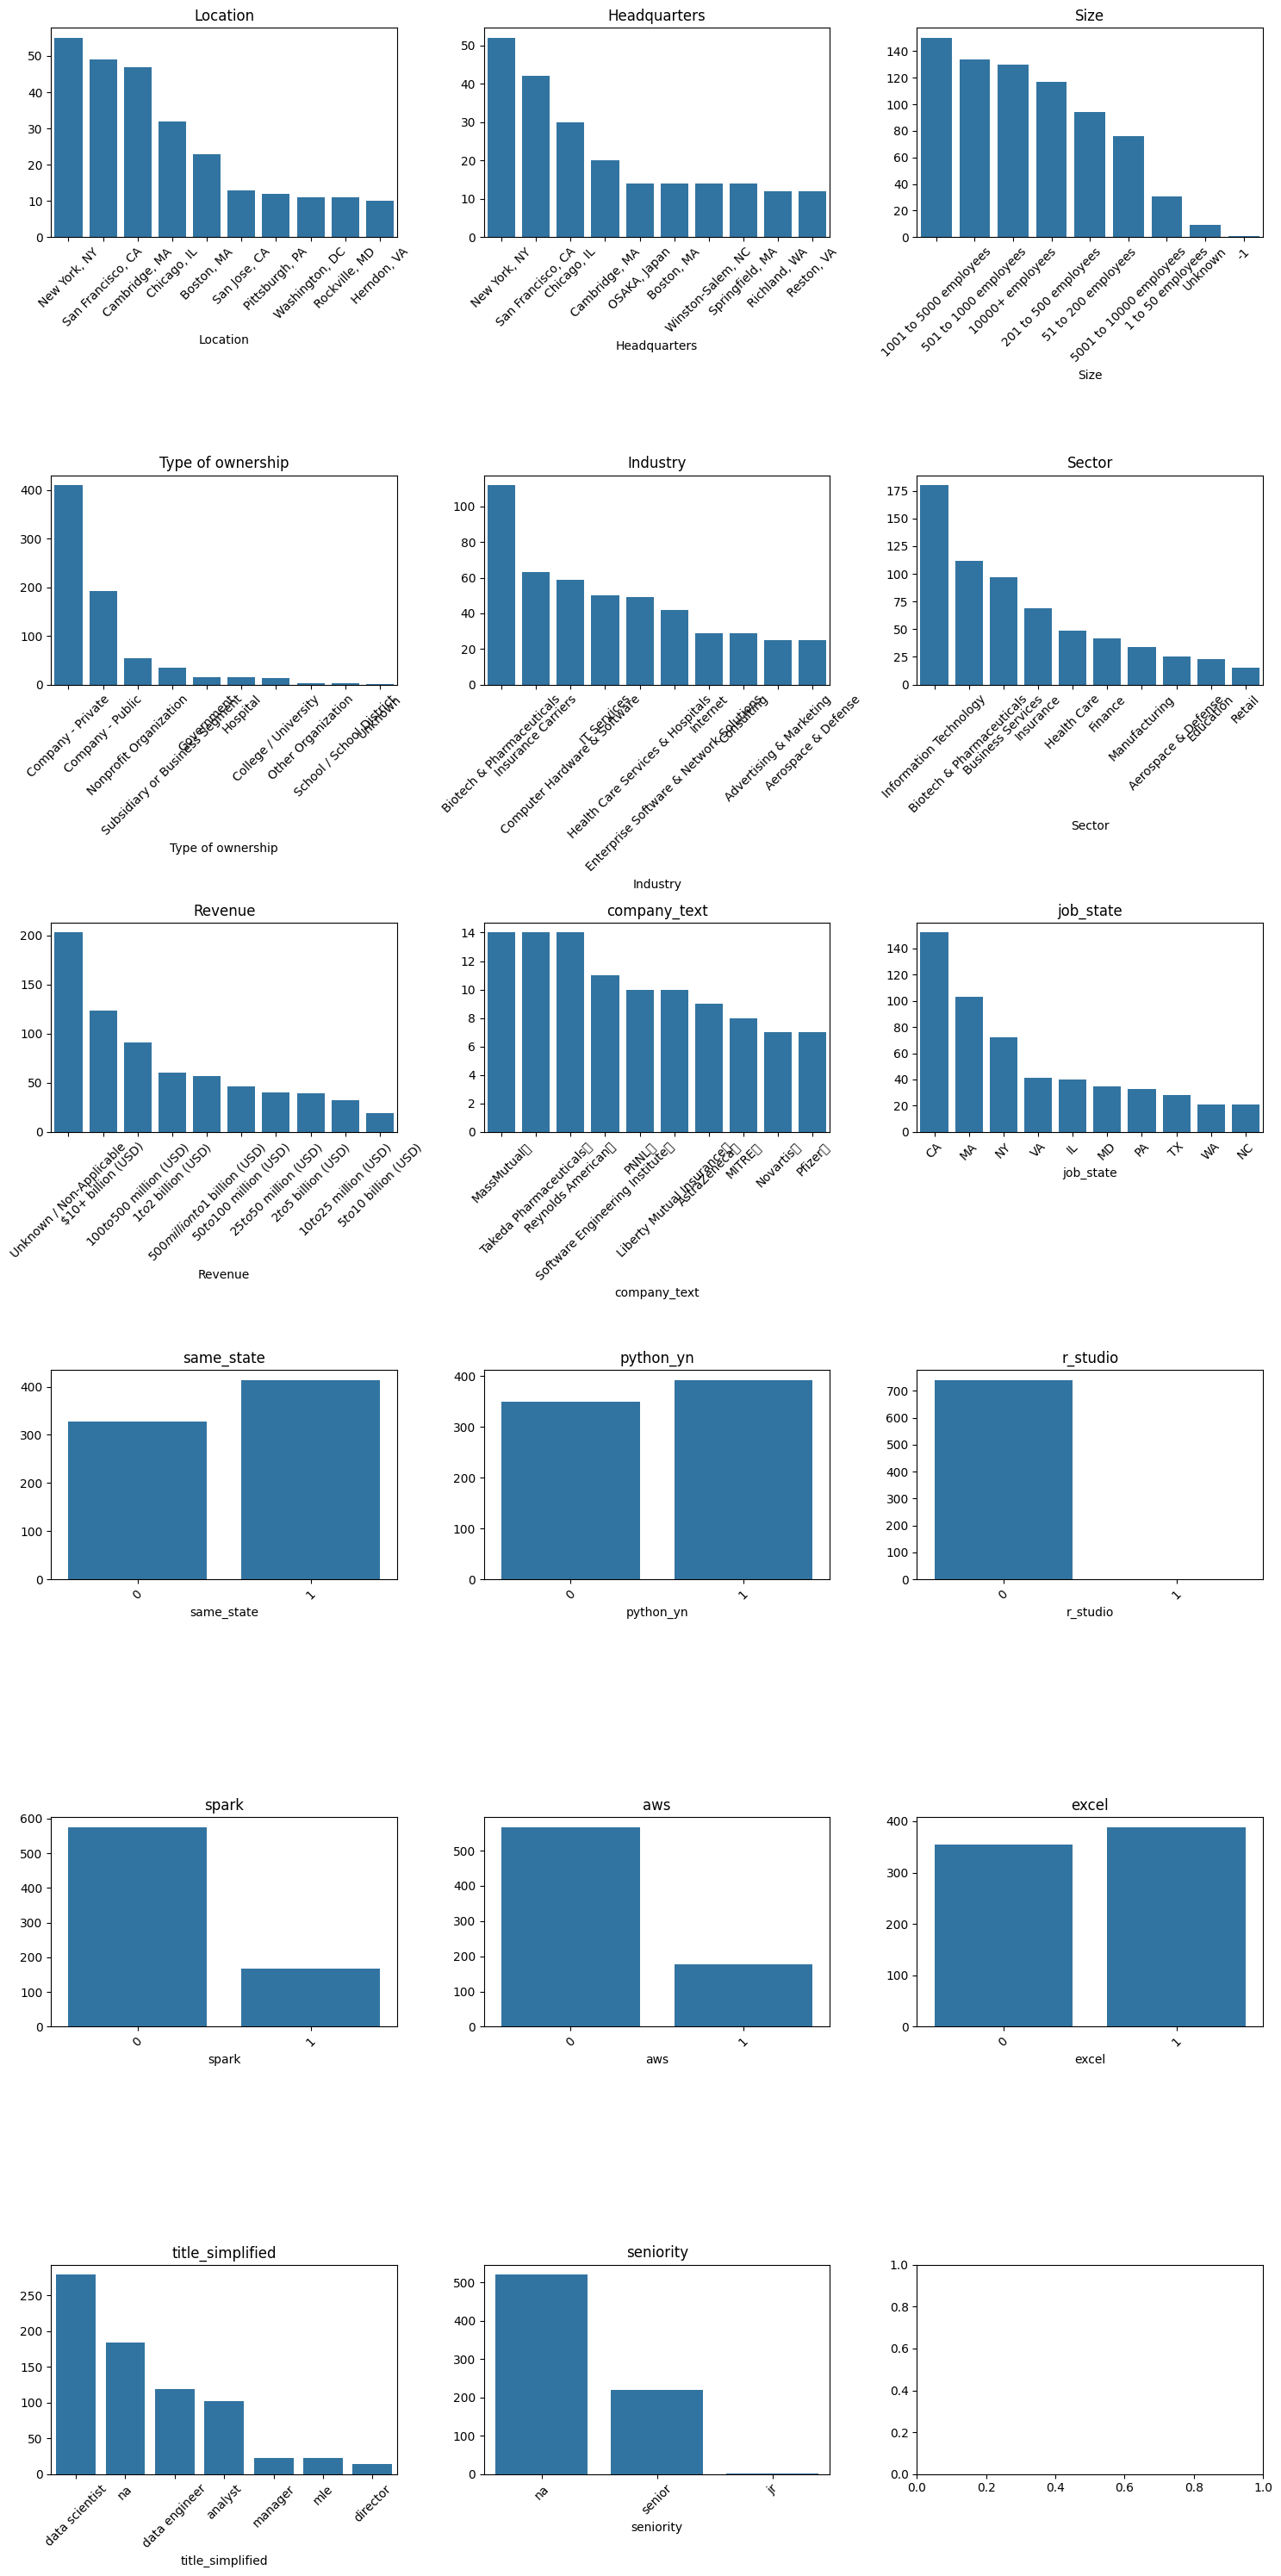

In [21]:
# Number of categorical columns
num_cols = len(categorical_df.columns)

# Define the number of rows and columns for subplots
cols = 3  # Number of plots per row (adjust as needed)
rows = math.ceil(num_cols / cols)  # Calculate required rows

# Create figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Ensure `axes` is iterable in all cases
axes = axes.flatten() if num_cols > 1 else [axes]

# Iterate over each categorical column and plot it
for idx, col in enumerate(categorical_df.columns):
    sns.barplot(
        x=categorical_df[col].value_counts().index[:10],  # Top 10 most frequent values
        y=categorical_df[col].value_counts().values[:10], 
        ax=axes[idx]
    )
    axes[idx].set_title(col)  # Set title with column name
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)  # Rotate labels

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [22]:
salary_df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'same_state',
       'company_age', 'python_yn', 'r_studio', 'spark', 'aws', 'excel',
       'title_simplified', 'seniority', 'desc_len', 'number_comp'],
      dtype='object')

In [23]:
pd.pivot_table(salary_df,index=['title_simplified','seniority'],values='average_salary')

average_salary
title_simplified seniority                
analyst          jr              56.500000
                 na              61.155405
                 senior          79.092593
data engineer    na              96.701220
                 senior         124.689189
data scientist   jr             106.500000
                 na             107.043011
                 senior         138.956522
director         na             168.607143
manager          na              84.022727
mle              na             119.133333
                 senior         142.071429
na               na              73.988189
                 senior         109.061404

In [24]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)
pd.pivot_table(salary_df,index=['job_state','title_simplified'],aggfunc='count',values='average_salary').sort_values('job_state',ascending=False)

average_salary
job_state title_simplified                
WI        na                             4
          data scientist                 3
          analyst                        3
WA        na                             1
          data scientist                17
          analyst                        3
VA        na                             5
          mle                            2
          data scientist                18
          data engineer                 10
          analyst                        6
UT        data engineer                  3
          analyst                        4
          data scientist                 3
TX        na                             7
          data scientist                13
          data engineer                  8
TN        data scientist                 1
          data engineer                 10
          analyst                        2
SC        na                             1
RI        analyst                        1
PA        manager                        3
          data engineer                  1
          data scientist                 6
          analyst                        8
          mle                            7
          na                             8
OR        data scientist                 3
          data engineer                  1
OH        na                             3
          data scientist                 7
          analyst                        4
NY        na                            12
          mle                            2
          data scientist                40
          data engineer                  4
          analyst                       14
NM        data scientist                 3
NJ        data scientist                 4
          analyst                        6
          data engineer                  2
          manager                        2
          director                       2
          na                             1
NE        na                             4
NC        na                            12
          data scientist                 3
          data engineer                  6
MO        na                             3
          manager                        1
          data scientist                 3
          analyst                        2
MN        data engineer                  1
          analyst                        1
MI        manager                        2
          data scientist                 4
MD        na                            16
          data scientist                13
          data engineer                  3
          analyst                        3
MA        na                            46
          manager                        5
          director                       6
          data scientist                30
          data engineer                 12
          analyst                        4
LA        analyst                        1
          data engineer                  2
          na                             1
KY        na                             4
          data scientist                 2
KS        mle                            3
IN        na                             4
          data scientist                 2
          data engineer                  4
IL        analyst                        3
          na                             6
          mle                            2
          director                       6
          data scientist                15
          data engineer                  8
ID        analyst                        2
IA        analyst                        2
          data engineer                  3
GA        data scientist                 3
          na                             3
FL        data scientist                 7
          data engineer                  3
          analyst                        6
DE        na                             6
DC        data scientist     

In [25]:
pd.pivot_table(salary_df[salary_df.title_simplified=='data scientist'],index=['job_state'],values='average_salary').sort_values('average_salary',ascending=False)

,average_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Clagu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Clagu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


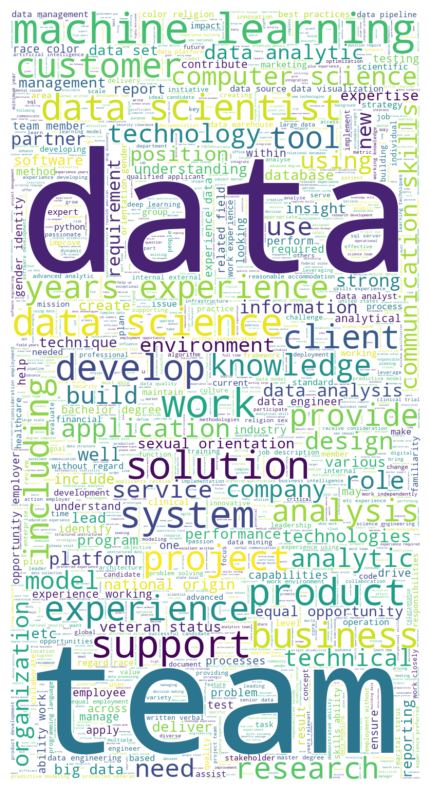

In [27]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt_tab')
# Join all job descriptions into a single text
words = " ".join(salary_df['Job Description'])

def punctuation_stop(text):
    """Remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    
    return filtered

# Apply text cleaning
words_filtered = punctuation_stop(words)

# Join the filtered words into a single string
text = " ".join([ele for ele in words_filtered])

# Generate the word cloud
wc = WordCloud(
    background_color="white", 
    random_state=1, 
    stopwords=STOPWORDS, 
    max_words=2000, 
    width=800, 
    height=1500
)

wc.generate(text)

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [29]:
salary_df.to_csv('data/glassdoor_eda.csv',index=False)